In [43]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split 	
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib
%watermark -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

Mon Jan 06 2020 

CPython 3.6.9
IPython 7.11.1

numpy 1.18.0
pandas 0.25.3
sklearn 0.0
matplotlib 3.1.2
seaborn 0.9.0

compiler   : GCC 8.3.0
system     : Linux
release    : 5.0.0-37-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [12]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(dataset_url, sep =';')

In [25]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


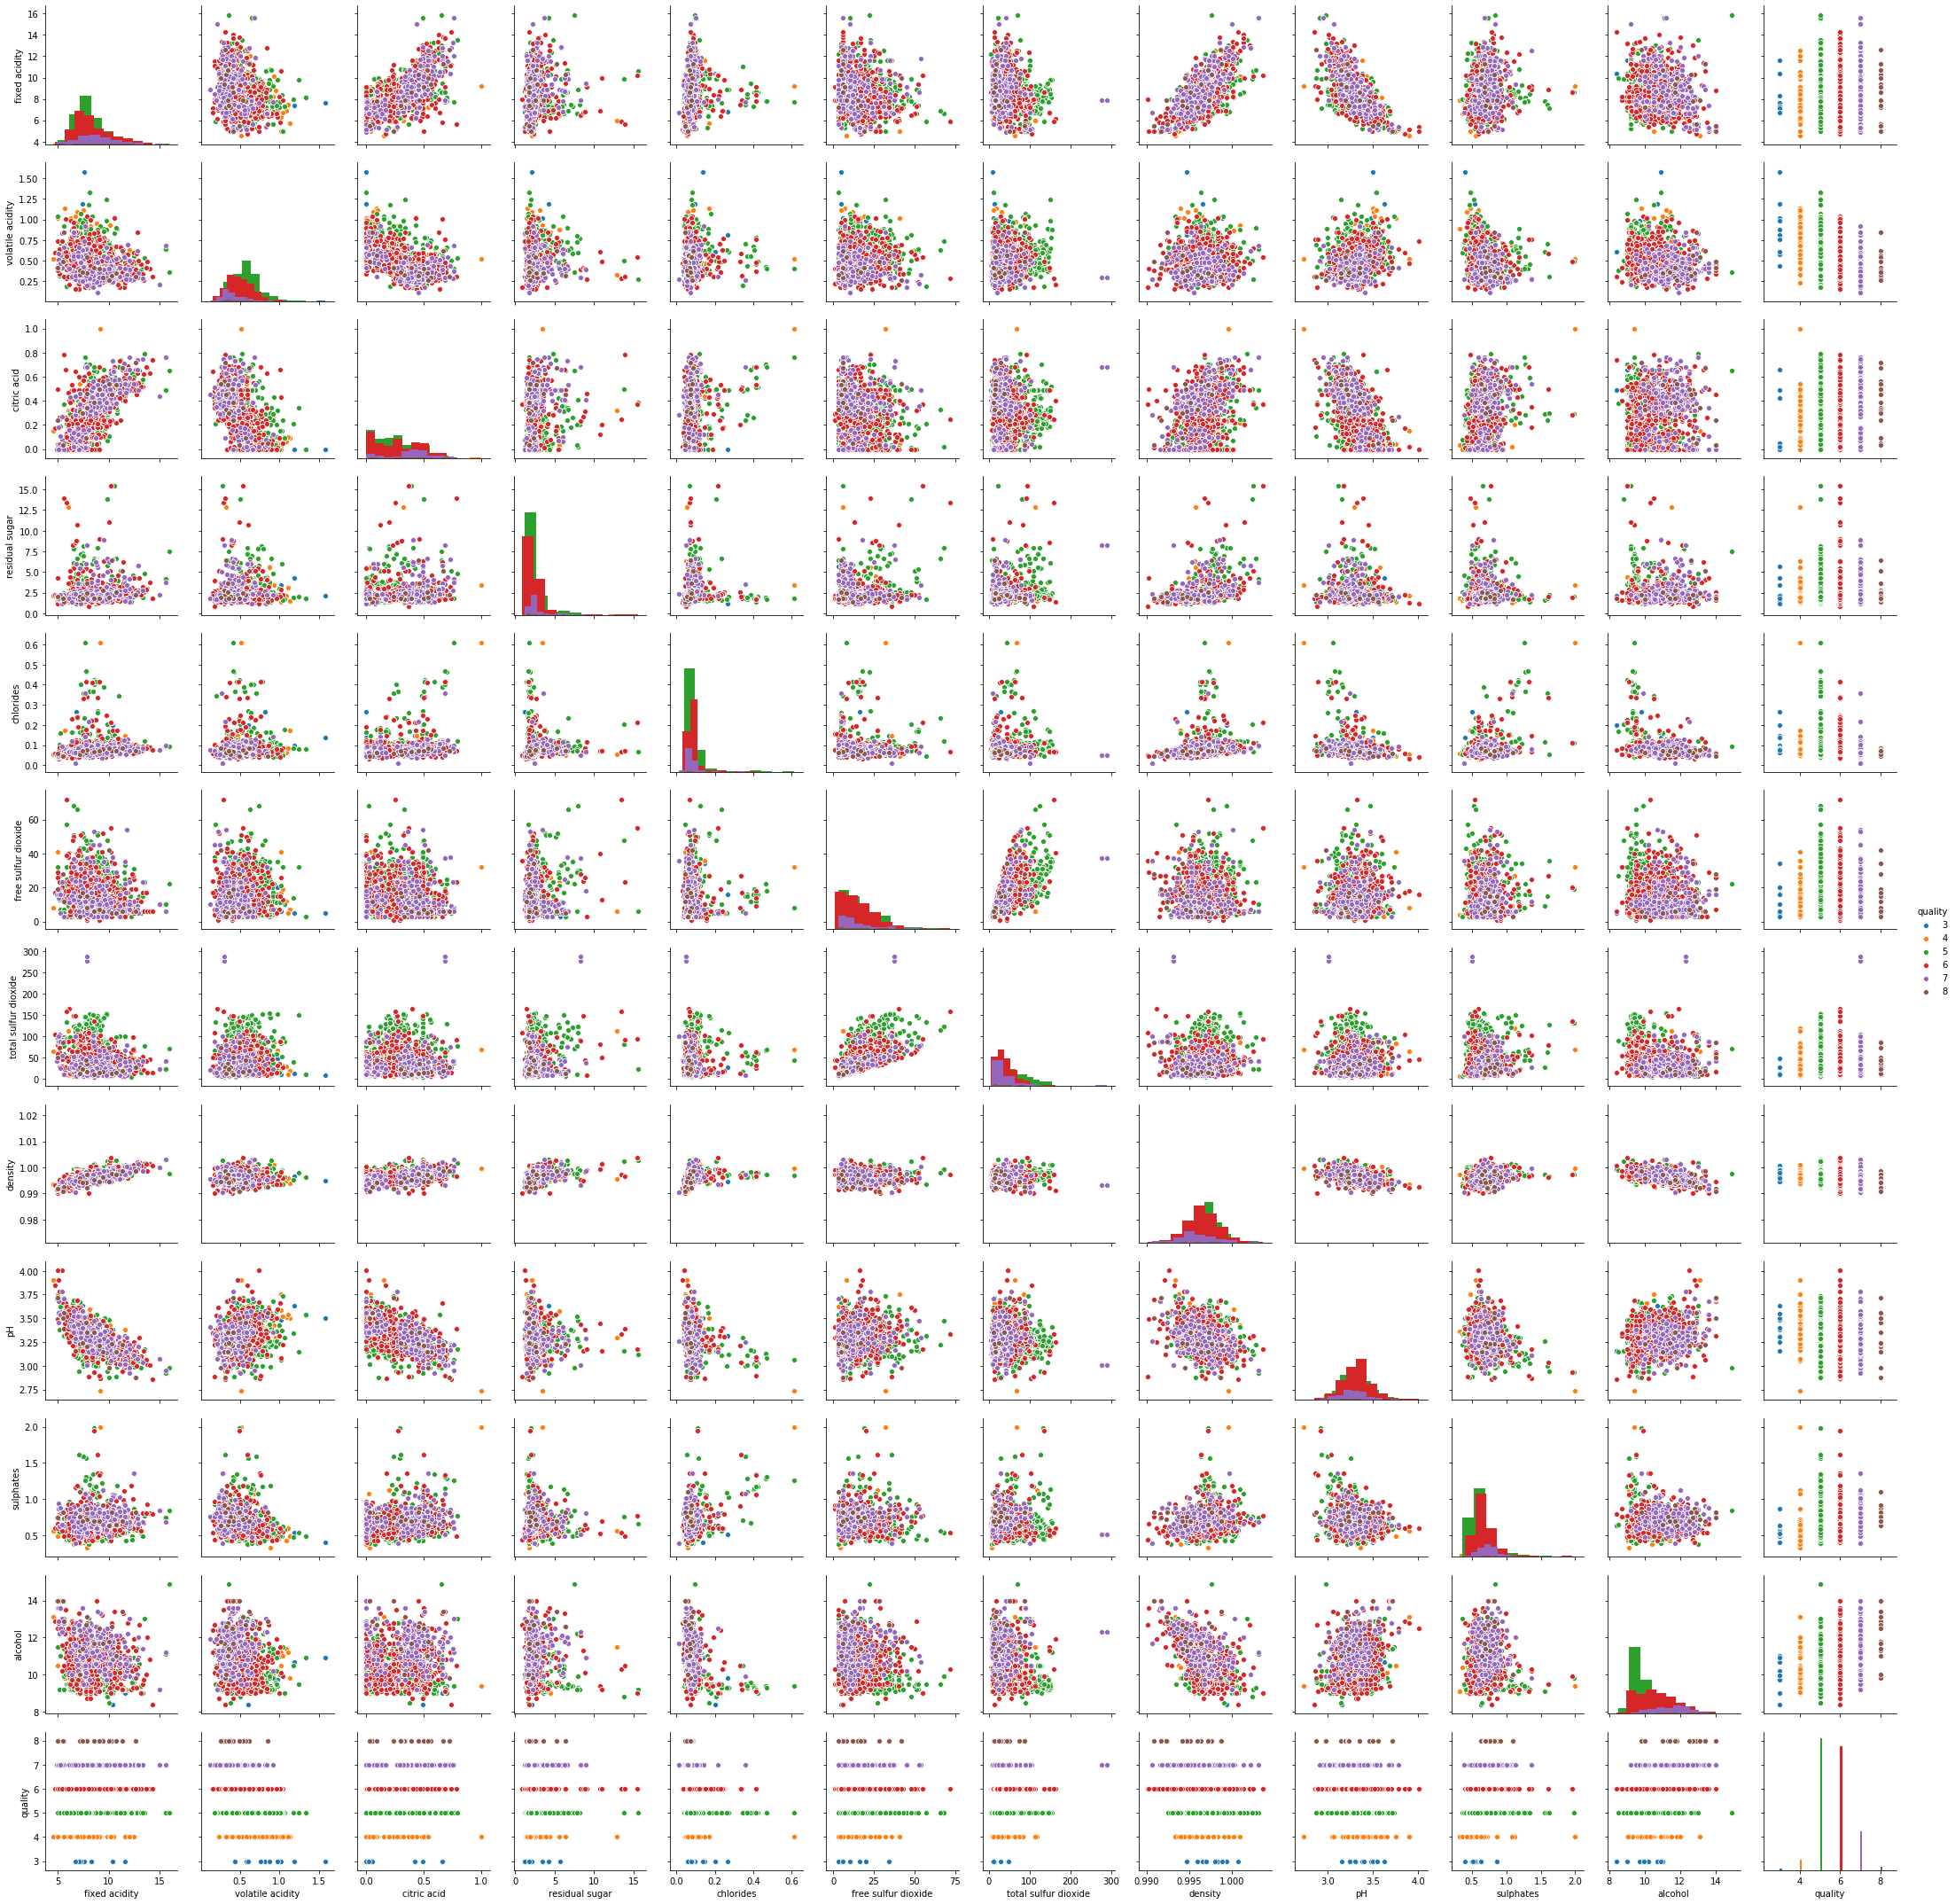

In [28]:
sb.pairplot(df, hue='quality', diag_kind='hist')

In [29]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [31]:
y = df.quality
X = df.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [34]:
X_train_scaled = preprocessing.scale(X_train)
X_train_scaled

array([[ 0.51358886,  2.19680282, -0.164433  , ...,  1.08415147,
        -0.69866131, -0.58608178],
       [-1.73698885, -0.31792985, -0.82867679, ...,  1.46964764,
         1.2491516 ,  2.97009781],
       [-0.35201795,  0.46443143, -0.47100705, ..., -0.13658641,
        -0.35492962, -0.20843439],
       ...,
       [-0.98679628,  1.10708533, -0.93086814, ...,  0.24890976,
        -0.98510439,  0.35803669],
       [-0.69826067,  0.46443143, -1.28853787, ...,  1.08415147,
        -0.35492962, -0.68049363],
       [ 3.1104093 , -0.62528606,  2.08377675, ..., -1.61432173,
         0.79084268, -0.39725809]])

In [35]:
X_train_scaled.mean(axis=0)

array([ 1.16664562e-16, -3.05550043e-17, -8.47206937e-17, -2.22218213e-17,
        2.22218213e-17, -6.38877362e-17, -4.16659149e-18, -2.54439854e-15,
       -8.70817622e-16, -4.08325966e-16, -1.17220107e-15])

In [36]:
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [45]:
X_train_scaled = scaler.transform(X_train)
 
print(X_train_scaled.mean(axis=0))
# [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 
print(X_train_scaled.std(axis=0))
# [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]

[ 1.16664562e-16 -3.05550043e-17 -8.47206937e-17 -2.22218213e-17
  2.22218213e-17 -6.38877362e-17 -4.16659149e-18 -2.54439854e-15
 -8.70817622e-16 -4.08325966e-16 -1.17220107e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [46]:
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100))

In [47]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'], 'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [48]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                            

In [51]:
best = clf.best_params_
clf.refit

True

In [53]:
y_pred = clf.predict(X_test)
	
print(r2_score(y_test, y_pred))
 
print(mean_squared_error(y_test, y_pred))

0.4818407893940312
0.33435437500000004
